In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [72]:
df = pd.read_csv("/kaggle/input/clean-dataset/Clean_Dataset.csv",index_col=0)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [73]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [74]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [75]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [76]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [77]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [78]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [79]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [80]:
df.duration.max()

49.83

In [81]:
df.duration.min()

0.83

In [82]:
df.duration.median()

11.25

## Preprocessing

In [83]:
df = df.drop(columns=['Unnamed: 0', 'flight'], errors='ignore')
df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585


In [84]:
df.stops=pd.factorize(df.stops)[0]
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [85]:
df=df.join(pd.get_dummies(df.airline,prefix='airline')).drop('airline',axis=1)
df=df.join(pd.get_dummies(df.source_city,prefix='source')).drop('source_city',axis=1)
df=df.join(pd.get_dummies(df.arrival_time,prefix='arrival')).drop('arrival_time', axis=1)
df=df.join(pd.get_dummies(df.destination_city,prefix='dest')).drop('destination_city', axis=1)
df=df.join(pd.get_dummies(df.departure_time,prefix='departure')).drop('departure_time', axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_Mumbai,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


## Model_Training

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X,y = df.drop('price',axis=1), df.price

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [88]:
reg=RandomForestRegressor(n_jobs=-1)
reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [89]:
reg.score(X_test,y_test)

0.9857952613129528

In [90]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred=reg.predict(X_test)
print('R2:',r2_score(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',math.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.9857952613129528
MAE: 1055.9177805417598
MSE: 7356696.343501637
RMSE: 2712.3230529385023


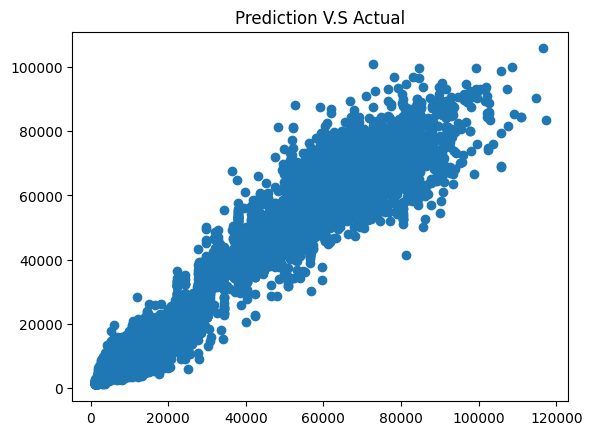

In [91]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlable=("Actuall Flight Price")
plt.ylabel=("Predicted Flight Price")
plt.title("Prediction V.S Actual")
plt.show()

In [92]:
importances = dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x:x[1],reverse=True)

sorted_importances

[('class', 0.8800207008323556),
 ('duration', 0.057735831492495795),
 ('days_left', 0.018567397269801778),
 ('airline_Vistara', 0.005351828934885042),
 ('airline_Air_India', 0.004512839730950799),
 ('source_Delhi', 0.00381392190460094),
 ('dest_Delhi', 0.003398863650382909),
 ('source_Mumbai', 0.0021948135977636514),
 ('dest_Mumbai', 0.001992461859692748),
 ('source_Kolkata', 0.0018075589291075736),
 ('stops', 0.0017672400571340854),
 ('dest_Kolkata', 0.0017451395209805037),
 ('dest_Hyderabad', 0.001572295078717148),
 ('arrival_Evening', 0.0015152949780365163),
 ('source_Hyderabad', 0.001226981607130897),
 ('arrival_Night', 0.001134786882071855),
 ('dest_Bangalore', 0.0011158460620435363),
 ('departure_Evening', 0.0011017593397502894),
 ('source_Bangalore', 0.001052406721268665),
 ('arrival_Afternoon', 0.0010345319323905983),
 ('dest_Chennai', 0.0008762037430021827),
 ('source_Chennai', 0.0008679464762902615),
 ('departure_Morning', 0.0008561617751205654),
 ('departure_Early_Morning', 

<BarContainer object of 10 artists>

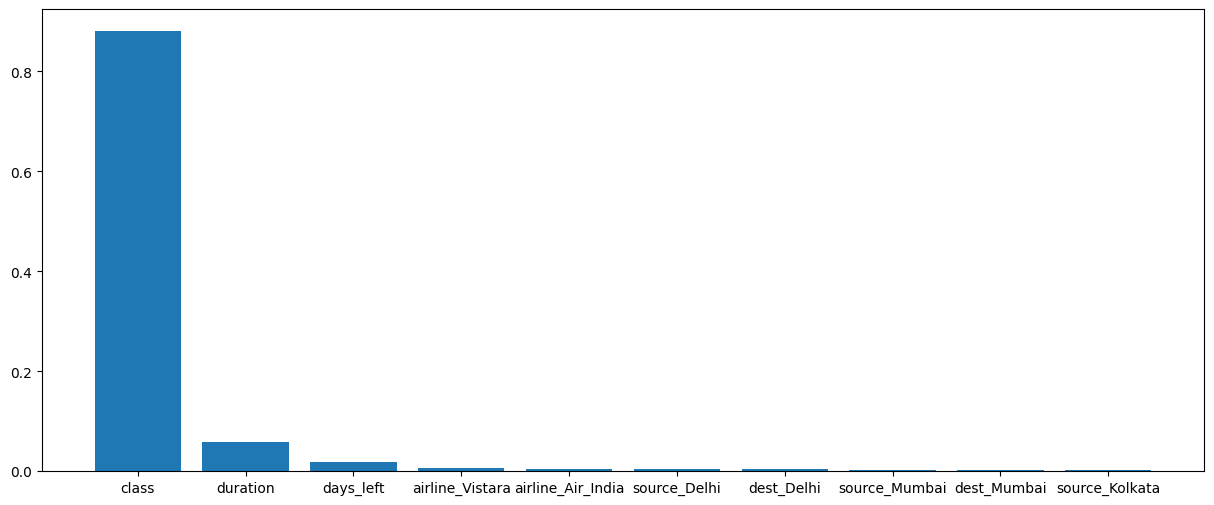

In [93]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

## Tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'sqrt']  # Removed 'auto' to avoid the deprecation warning
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=  43.0s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 4.6min


In [99]:
best_regressor.score(X_test, y_test)

0.9865950855074864

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=  42.3s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 4.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=  42.8s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 4.2min


In [100]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred=best_regressor.predict(X_test)
print('R2:',r2_score(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',math.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.9865950855074864
MAE: 1073.17463360591
MSE: 6942463.892134181
RMSE: 2634.8555732969844


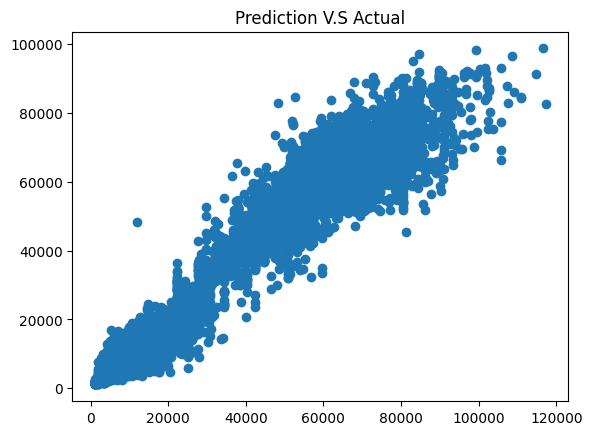

In [101]:
plt.scatter(y_test,y_pred)
plt.xlable=("Actuall Flight Price")
plt.ylabel=("Predicted Flight Price")
plt.title("Prediction V.S Actual")
plt.show()

## Predict